In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [81]:
df = pd.read_csv("Captify_data.csv", sep=",")
df.head()

,DSP,test_name,event_date,site_domain,line_item_id,campaign_id,strategyname,delivery_country,media_type__c,impressions,clicks,viewableimpressions,media_costs_gbp,data_costs_gbp
0,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,derbytelegraph.co.uk/news,24088428,7946922,Existing Cookieless,GB,Display,104,0,94,0.126419,0.01664
1,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,mail.com,24084416,9442139,Existing Cookieless,GB,Display,28,0,20,0.045533,0.00448
2,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,lowestoftjournal.co.uk,24084416,9442139,Existing Cookieless,GB,Display,3,0,1,0.007590,0.00048
3,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,thescarboroughnews.co.uk,24088428,7946922,RNA,GB,Display,161,0,105,0.177725,0.02576
4,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,birminghammail.co.uk/news,24088428,7946922,Experimental Cookieless,GB,Display,247,0,215,0.261911,0.03952


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31453 entries, 0 to 31452
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DSP                  31453 non-null  object 
 1   test_name            31453 non-null  object 
 2   event_date           31453 non-null  object 
 3   site_domain          31451 non-null  object 
 4   line_item_id         31453 non-null  int64  
 5   campaign_id          31453 non-null  int64  
 6   strategyname         31453 non-null  object 
 7   delivery_country     31453 non-null  object 
 8   media_type__c        31453 non-null  object 
 9   impressions          31453 non-null  int64  
 10  clicks               31453 non-null  int64  
 11  viewableimpressions  31453 non-null  int64  
 12  media_costs_gbp      31453 non-null  float64
 13  data_costs_gbp       31453 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 3.4+ MB


In [94]:
# insert new columns with CPI and CPC calculation

cpi_cal = lambda x: (x["media_costs_gbp"]/x["impressions"])*1000

df["cost_per_impression"] = df.apply(cpi_cal,axis = 1)

df.head()

,DSP,test_name,event_date,site_domain,line_item_id,campaign_id,strategyname,delivery_country,media_type__c,impressions,clicks,viewableimpressions,media_costs_gbp,data_costs_gbp,cost_per_impression,cost_per_click
0,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,derbytelegraph.co.uk/news,24088428,7946922,Existing Cookieless,GB,Display,104,0,94,0.126419,0.01664,1.215567,0.0
1,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,mail.com,24084416,9442139,Existing Cookieless,GB,Display,28,0,20,0.045533,0.00448,1.626194,0.0
2,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,lowestoftjournal.co.uk,24084416,9442139,Existing Cookieless,GB,Display,3,0,1,0.007590,0.00048,2.530070,0.0
3,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,thescarboroughnews.co.uk,24088428,7946922,RNA,GB,Display,161,0,105,0.177725,0.02576,1.103882,0.0
4,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,birminghammail.co.uk/news,24088428,7946922,Experimental Cookieless,GB,Display,247,0,215,0.261911,0.03952,1.060367,0.0


In [84]:
# program to add CPC calculation in the data frame
# defining a function to avoid the zerodivision error

def cpc_cal(x):
    if x["clicks"] != 0:
        return x["media_costs_gbp"]/x["clicks"]
    else:
        return 0
    

df["cost_per_click"] = df.apply(cpc_cal, axis = 1)
df.head()


,DSP,test_name,event_date,site_domain,line_item_id,campaign_id,strategyname,delivery_country,media_type__c,impressions,clicks,viewableimpressions,media_costs_gbp,data_costs_gbp,cost_per_impression,cost_per_click
0,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,derbytelegraph.co.uk/news,24088428,7946922,Existing Cookieless,GB,Display,104,0,94,0.126419,0.01664,0.001216,0.0
1,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,mail.com,24084416,9442139,Existing Cookieless,GB,Display,28,0,20,0.045533,0.00448,0.001626,0.0
2,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,lowestoftjournal.co.uk,24084416,9442139,Existing Cookieless,GB,Display,3,0,1,0.007590,0.00048,0.002530,0.0
3,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,thescarboroughnews.co.uk,24088428,7946922,RNA,GB,Display,161,0,105,0.177725,0.02576,0.001104,0.0
4,Xandr,Xandr - CXS - GPT ANNOTATION TEST,2024-01-26,birminghammail.co.uk/news,24088428,7946922,Experimental Cookieless,GB,Display,247,0,215,0.261911,0.03952,0.001060,0.0


In [91]:
site_df = df.groupby("site_domain")[["impressions","viewableimpressions","clicks","media_costs_gbp","data_costs_gbp","cost_per_impression","cost_per_click"]].sum()
print(site_df)
#print(df.groupby('Married')['Balance'].mean())
#sort_values( by = "viewableimpressions", ascending=False))

                    impressions  viewableimpressions  clicks  media_costs_gbp  \
site_domain                                                                     
01net.com                     1                    0       0         0.001317   
1001freefonts.com             5                    4       0         0.015512   
101planners.com               1                    1       0         0.001560   
101soundboards.com           34                   20       0         0.077801   
10fastfingers.com            14                   11       0         0.012563   
...                         ...                  ...     ...              ...   
zone-turf.fr                  1                    0       0         0.000336   
zone.msn.com               1081                  868       0         0.735375   
zoo.com                       1                    1       0         0.004441   
zoopla.co.uk               1991                 1607       2         1.936407   
zynga.com                   

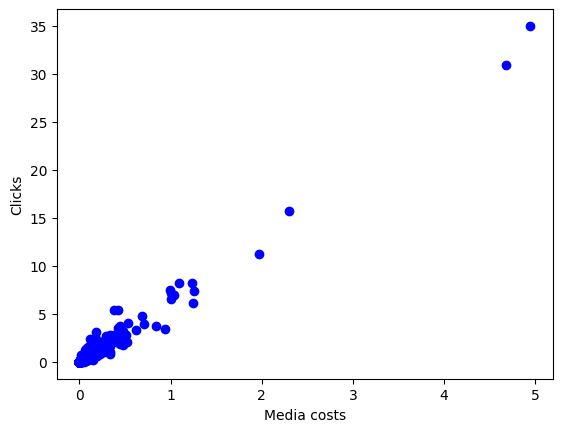

In [86]:
# program to find linear relationship between media costs and number of clicks
# Selecting rows and colums from data frame 

x = site_df.iloc[:,4].values.reshape(-1,1)
y = site_df.iloc[:,3].values.reshape(-1,1)

plt.scatter (x,y,color = 'b')
plt.xlabel ("Media costs")
plt.ylabel("Clicks")
plt.show()




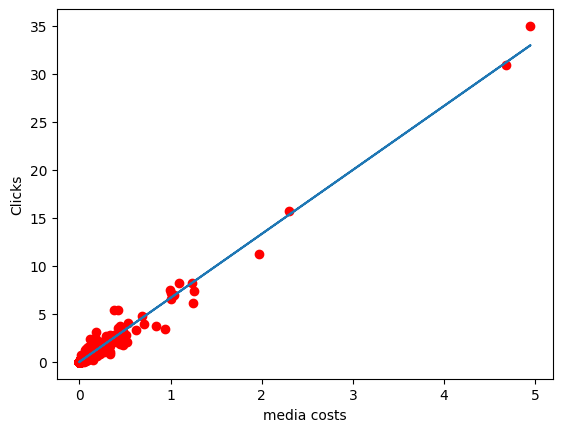

In [87]:
#fit the model and plot the data
simple_model = LinearRegression()
simple_model.fit(x,y)
y_pred = simple_model.predict(x)

plt.scatter(x, y, color = 'r')
plt.plot(x, y_pred)
plt.xlabel("media costs")
plt.ylabel("Clicks")
plt.show()

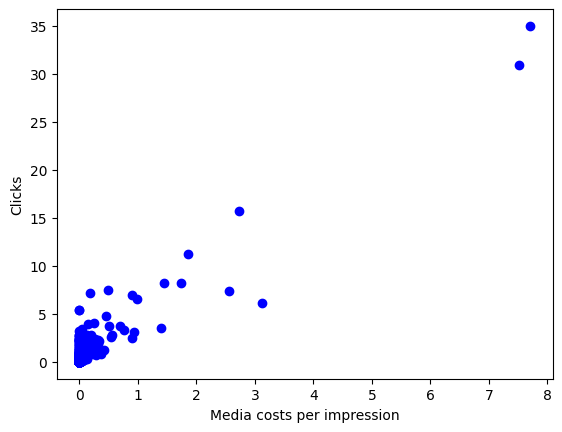

In [92]:
# program to find linear relationship between cost per impression and number of clicks
# Selecting rows and colums from data frame 

x = site_df.iloc[:,6].values.reshape(-1,1)
y = site_df.iloc[:,3].values.reshape(-1,1)

plt.scatter (x,y,color = 'b')
plt.xlabel ("Media costs per impression")
plt.ylabel("Clicks")
plt.show()

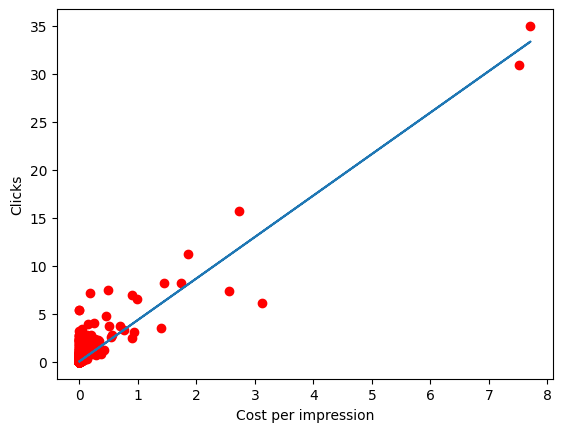

In [93]:
simple_model = LinearRegression()
simple_model.fit(x,y)
y_pred = simple_model.predict(x)

plt.scatter(x, y, color = 'r')
plt.plot(x, y_pred)
plt.xlabel("Cost per impression")
plt.ylabel("Clicks")
plt.show()


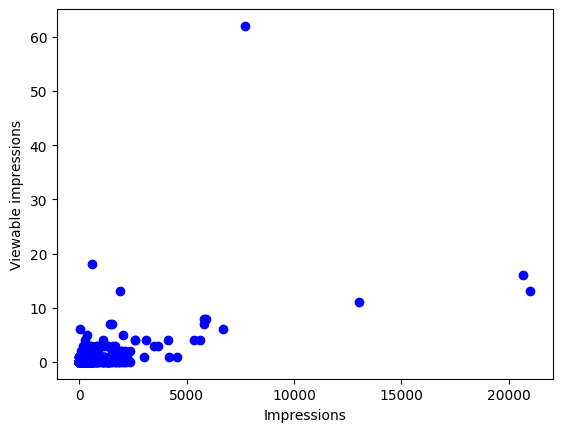

In [88]:
# program to see if there is a correlation between no of impressions and viewability
# Selecting rows and colums from data frame

x = site_df.iloc[:,1].values.reshape(-1,1)
y = site_df.iloc[:,2].values.reshape(-1,1)

plt.scatter (x,y,color = 'b')
plt.xlabel ("Impressions")
plt.ylabel("Viewable impressions")
plt.show()


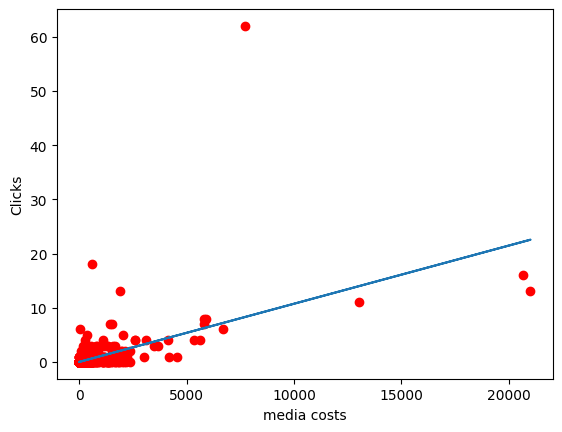

In [89]:
#fit the model and plot the data
simple_model = LinearRegression()
simple_model.fit(x,y)
y_pred = simple_model.predict(x)

plt.scatter(x, y, color = 'r')
plt.plot(x, y_pred)
plt.xlabel("media costs")
plt.ylabel("Clicks")
plt.show()